In [3]:
import numpy as np
import pandas as pd
import librosa
from IPython.display import display
import IPython.display as ipd
import IPython
import librosa.display
import os
import random
from glob import glob

In [4]:
filenames = glob('../input/subescobangla-speech-emotion-dataset/SUBESCO/*.wav')

labels = []
for each in filenames:
    each = each.split('/')[-1][:-3]
    labels.append(each.split('_')[-2])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
from scipy.io import wavfile
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [6]:
# file = filenames[0]
data = [] # X


from tqdm import tqdm

# reading the files here

for file in tqdm(filenames):
    temp = scipy.io.wavfile.read(file, mmap=False)
    data.append(temp[1])

index = [] # y
for each in labels:
    index.append(list(np.unique(labels)).index('FEAR'))

100%|██████████| 7000/7000 [01:16<00:00, 91.54it/s] 


In [10]:
data[9]

array([ 0, -1,  2, ...,  0, -1,  1], dtype=int16)

[ 1 -2  2 ... -1  0  1]
SURPRISE


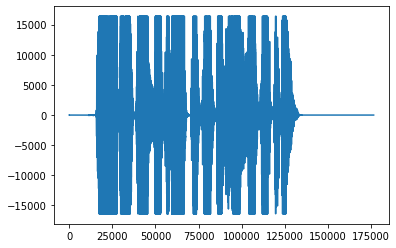

In [11]:
index = 6066
print(data[index])
print(labels[index])
plt.plot(data[index])

ipd.Audio(filenames[index])

#মৌমাছির  চাক  দেখে কুকুরটি ঘেউ ঘেউ করছে  :v 
# 

[[ 0  0]
 [ 0  0]
 [ 1  0]
 ...
 [ 1 -2]
 [-2  2]
 [ 3 -2]]
FEAR


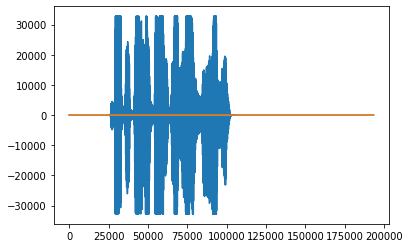

In [16]:
index = 0
print(data[index])
print(labels[index])
plt.plot(data[index])

ipd.Audio(filenames[index])

#তোমার কাজটা করা ঠিক হয় নি 
# 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


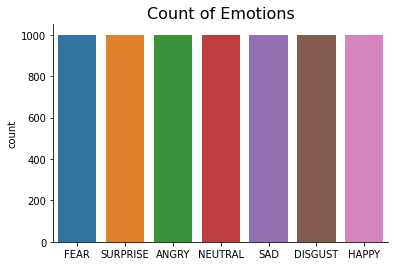

In [17]:
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(labels)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [19]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

0
[ 2.1232415e-06 -2.3947969e-06 -1.3354861e-07 ... -3.6816229e-07
  3.8521493e-06  0.0000000e+00]


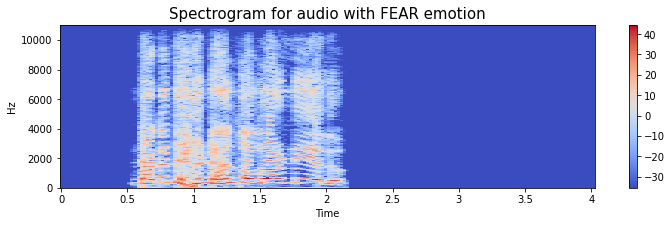

In [20]:
spectogram = []
# idx = 39
for idx in range(7000):
    print(idx)
    emotion=labels[idx]
    path = filenames[idx]
    dataTemp, sampling_rate = librosa.load(path)
    print(dataTemp)

    a = create_spectrogram(dataTemp, sampling_rate, emotion)
        #Audio(path)
    spectogram.append(a)
    break

In [22]:
len(spectogram)

1

# **Data Augmentation**

In [24]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# Shifting the sound
def shift_sound(data):
    data_roll = np.roll(data, 1600)
    return data_roll
# Adding white noise 
def white_noise(data):
    wn = np.random.randn(len(data))
    data_wn = data + 0.005*wn
    return data_wn
#Stretching the sound
def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

# taking any example and checking for techniques.

# index= 5908
# path = filenames[index]
# dataTemp, sample_rate = librosa.load(path)

# Sample Augmented Audio Visualization

[-0.0011479  -0.00119637 -0.00103967 ... -0.00117388 -0.00118924
 -0.00099857]
HAPPY


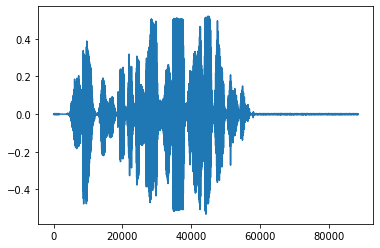

In [28]:
index = 5908
path = filenames[index]
temp, sample_rate = librosa.load(path)
sft_sound = shift_sound(temp)
print(sft_sound)
print(labels[index])
plt.plot(sft_sound)
ipd.Audio(sft_sound, rate = sample_rate)
#সে কোন কিছু না বলেই চলে গেছে

[-0.00398958 -0.00937483 -0.00046805 ...  0.00245846  0.00842351
  0.00105659]
FEAR


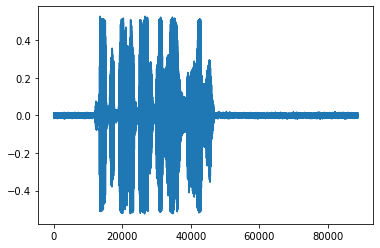

In [30]:
index = 0
path = filenames[index]
temp, sample_rate = librosa.load(path)
w_noise = white_noise(temp)
print(w_noise)
print(labels[index])
plt.plot(w_noise)
ipd.Audio(w_noise, rate = sample_rate)
#সে কোন কিছু না বলেই চলে গেছে

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Pass rate=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error


[ 7.8672139e-07 -1.7330048e-06  4.0551963e-06 ... -1.6742996e-04
 -3.0068291e-04 -2.2625425e-04]
HAPPY


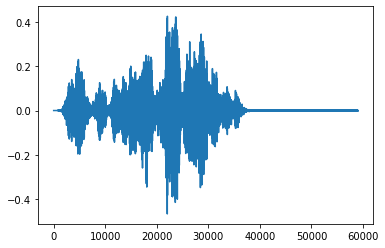

In [31]:
index = 5908
path = filenames[index]
temp, sample_rate = librosa.load(path)
sft_sound = stretch(temp, 1.5)
print(sft_sound)
print(labels[index])
plt.plot(sft_sound)
ipd.Audio(sft_sound, rate = sample_rate)
#সে কোন কিছু না বলেই চলে গেছে

In [36]:
print(filenames[1500].split('/')[-1][:-4])
f = filenames[1500].split('/')[-1][:-4]
print("{}_whitenoice".format(f))

F_01_OISHI_S_10_SAD_5
F_01_OISHI_S_10_SAD_5_whitenoice


# Saving Output folder

In [37]:
# Saving white_noise audios to output
os.mkdir('/kaggle/working/white_noise')
for i in tqdm(range(1000)):
    x = random.randrange(0,7000)
    f = filenames[x].split('/')[-1][:-4]
    path = filenames[x]
    temp, sample_rate = librosa.load(path)
    wht_noise = white_noise(temp)
    scipy.io.wavfile.write("./white_noise/{}_whitenoice.wav".format(f),sample_rate,wht_noise)

100%|██████████| 1000/1000 [02:40<00:00,  6.24it/s]


In [38]:
os.mkdir('/kaggle/working/Shift')
for i in tqdm(range(1000)):
    x = random.randrange(0,7000)
    f = filenames[x].split('/')[-1][:-4]
    path = filenames[x]
    temp, sample_rate = librosa.load(path)
    wht_noise = shift_sound(temp)
    scipy.io.wavfile.write("./Shift/{}_Shift.wav".format(f),sample_rate,wht_noise)
    
    
os.mkdir('/kaggle/working/Stretch')
for i in tqdm(range(1000)):
    x = random.randrange(0,7000)
    f = filenames[x].split('/')[-1][:-4]
    path = filenames[x]
    temp, sample_rate = librosa.load(path)
    wht_noise = stretch(temp, 1.2)
    scipy.io.wavfile.write("./Stretch/{}_Stretch.wav".format(f),sample_rate,wht_noise)

100%|██████████| 1000/1000 [03:12<00:00,  5.21it/s]


In [41]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result